# Algorytmy i Struktury Danych

#### Literatura do rozszerzenia wiedzy

 - [Wstęp do algorytmów (Cormen T.H., Leierson C.E., Rivest R.L., Stein C.)](https://mitpress.mit.edu/9780262533058/introduction-to-algorithms/)

#### Instrukcja instalacji VS Code <a class="anchor" id="install"></a>

 - Zainstaluj narzędzia [Python](https://www.python.org/downloads/).

 - Pobierz [VS Code](https://code.visualstudio.com/).

 - Zainstaluj rozszerzenie [Python](https://marketplace.visualstudio.com/items?itemName=ms-python.python).

 - Zainstaluj rozszerzenie [Jupyter](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).

 - Zainstaluj rozszerzenie [Git Extension Pack](https://marketplace.visualstudio.com/items?itemName=donjayamanne.git-extension-pack).

#### Potrzebne importy

 - [os](https://docs.python.org/3/library/os.html)
 - [imageio](https://imageio.readthedocs.io/en/stable/) - wymagana instalacja
 - [matplotlib](https://matplotlib.org/) - wymagana instalacja
    * [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
 - [timeit](https://docs.python.org/3/library/timeit.html)
 - [numpy](https://numpy.org/) - wymagana instalacja
 - [scipy](https://scipy.org/) - wymagana instalacja
 - [math](https://docs.python.org/3/library/math.html)
    * [inf](https://en.wikipedia.org/wiki/IEEE_754-1985#Positive_and_negative_infinity)
    * [sqrt](https://en.wikipedia.org/wiki/Square_root)
    * [pi](https://en.wikipedia.org/wiki/Pi_number)
 - [random](https://docs.python.org/3/library/random.html)
 - [collections](https://docs.python.org/3/library/collections.html)
    * [deque](https://docs.python.org/3/library/collections.html#collections.deque)
 - [heapq](https://docs.python.org/3/library/heapq.html)


In [1]:
import os
import imageio
from timeit import default_timer
import numpy as np
from scipy import special as sp
from math import inf, sqrt, pi, log
from random import random, shuffle
from collections import deque
from heapq import heapify, heappop, heappush
from matplotlib import pyplot as plt

#### Ustawienia notatnika

W celu uruchomienia opcji `figure.figsize` należy wpierw wykonać dowolną akcję `pyplot`.

In [2]:
from matplotlib import rcParams
plt.show()
rcParams['figure.figsize'] = [6, 6]

#### Inne biblioteki warte zapoznania się

 - [pandas](https://pandas.pydata.org/)

### [Silnia](https://en.wikipedia.org/wiki/Factorial)

#### Naiwna implementacja rekurencyjna

In [3]:
def factorial1(n):
    if n == 0:
        return 1
    return n * factorial1(n - 1)

###### Zauważmy, że jeżeli uruchomimy powyższą funkcję dla wartości ujemnej lub niecałkowitej, to zostanie wyrzucony błąd przekroczenia stosu wywołań. W obu przypadkach funkcja będzie pomniejszała `n` o $1$ aż dojdzie do $0$, wartość ta jednak nie zostanie nigdy osiągnięta.

#### Dynamiczna implementacja ze słownikiem

In [4]:
def factorial2(n, memory={0:1}):
    if n in memory:
        return memory[n]
    memory[n] = n * factorial2(n - 1)
    return memory[n]

#### Implementacja przez pętlę

Zwróć uwagę, że `range(n)` to wartości $0\ldots(n-1)$, więc musimy je zwiększyć o 1.

In [5]:
def factorial3(n):
    x = 1
    for i in range(n):
        x *= i + 1
    return x

### [Liczby Fibonacciego](https://en.wikipedia.org/wiki/Fibonacci_number)

#### Naiwna implementacja rekurencyjna

Uwaga, bardzo szybko rośnie złożoność i może zadławić się dla $n \approx 40$

In [6]:
def fib1(n):
    if n == 0 or n == 1:
        return n
    return fib1(n - 1) + fib1(n - 2)

#### Dynamiczna implementacja ze słownikiem

In [7]:
def fib2(n, memory={0:0, 1:1}):
    if n in memory:
        return memory[n]
    else:
        memory[n] = fib2(n - 1) + fib2(n - 2)
        return memory[n]

#### Implementacja przez pętlę

In [8]:
def fib3(n: int):
    a, b = 0.0, 1.0
    for _ in range(n):
        a, b = b, a+b
    return a

## Złożoność obliczeniowa i pamięciowa

Przy opisywaniu złożoności algorytmu korzystamy z notacji [Bachmanna-Landaua](https://en.wikipedia.org/wiki/Big_O_notation#Family_of_Bachmann%E2%80%93Landau_notations). W poniższych przykładach będziemy wykorzystywali notację $O(\ldots)$ (wielki Omikron) i $\Theta(\ldots)$ (wielka Theta).

$f(n)=O(g(n))$ definiujemy jako $\exists_{k > 0} \exists_{n_0} \forall_{n>n_0} |f(n)|\leq k\cdot g(n)$, inaczej mówiąc, istnieje taka dodatnia stała $k$, że od pewnego momentu $n_0$ funkcja $k\cdot g(n)$ będzie ciągle niemniejsza od $f(n)$.

Rozpatrzmy na przykład funkcję $f(n) = 5n^2 - 12n + 1200$.

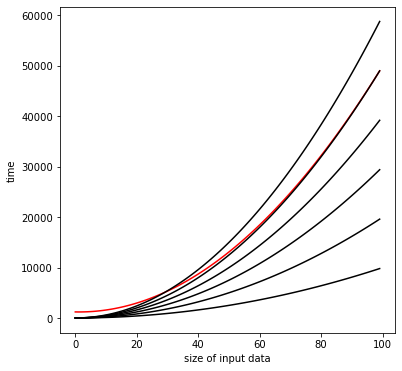

In [9]:
def f(n):
    return 5 * n**2 - 12 * n + 1200

def g(n):
    return n**2

N = 100
xs = np.arange(N)

plt.plot(xs, f(xs), 'r')
plt.plot(xs, 1 * g(xs), 'k')
plt.plot(xs, 2 * g(xs), 'k')
plt.plot(xs, 3 * g(xs), 'k')
plt.plot(xs, 4 * g(xs), 'k')
plt.plot(xs, 5 * g(xs), 'k')
plt.plot(xs, 6 * g(xs), 'k')
plt.xlabel("size of input data")
plt.ylabel("time");

Jak widać na powyższym wykresie, $f(n)$ jest z początku większa od wszelkich $g(n)$ przemnożonych przez stałe, ale od pewnego momentu $6\cdot g(n)$ wyprzedza $f(n)$ i nigdy nie daje się już wyprzedzić. Stąd możemy stwierdzić, że $f(n)=O(6\cdot g(n))=O(g(n))=O(n^2)$.

Text(0, 0.5, 'time')

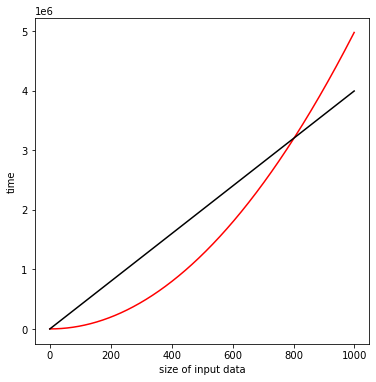

In [10]:
def f(n):
    return 5 * n**2 - 12 * n + 1200

def g(n):
    return n

N = 1000
xs = np.arange(N)

plt.plot(xs, f(xs), 'r')
plt.plot(xs, 4000 * g(xs), 'k')
plt.xlabel("size of input data")
plt.ylabel("time")

Dla $g(n)$ nawet dla wielkiej stałej, jaką jest $4000$, $f(n)$ w końcu dominuje, stąd $f(n)\neq O(n)$.

Text(0, 0.5, 'time')

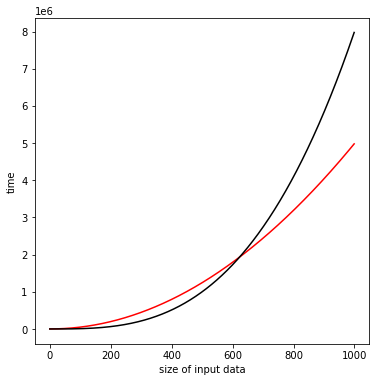

In [11]:
def f(n):
    return 5 * n**2 - 12 * n + 1200

def g(n):
    return n**3

N = 1000
xs = np.arange(N)

plt.plot(xs, f(xs), 'r')
plt.plot(xs, 0.008 * g(xs), 'k')
plt.xlabel("size of input data")
plt.ylabel("time")

Jak widać powyżej, $g(n)=n^3$ też dominuje $f(n)$, nawet, dla bardzo małej stałej. Oznacza to, że również $f(n)=O(n^3)$. Inaczej mówiąc, $f(n)=O(g(n))$, gdy $f(n)$ jest nie szybciej rosnące niż $g(n)$.

W momencie, gdy jesteśmy w stanie ograniczyć funkcję $f(n)$ z obu stron, to jest dla pewnej stałej $a$ od pewnego momentu będzie zachodziło $a\cdot g(n) < f(n)$ a dla innej stałej $b$ od pewnego momentu będzie zachodziło $b\cdot g(n) > f(n)$ to mówimy, że $f(n) = \Theta(g(n))$.

Formalna definicja to $f(n) = \Theta(g(n)) \iff \exists_{k_1 > 0} \exists_{k_2 > 0} \exists_{n_0} \forall_{n > n_0} k_1\cdot g(n) \leq f(n) \leq k_2\cdot g(n)$.

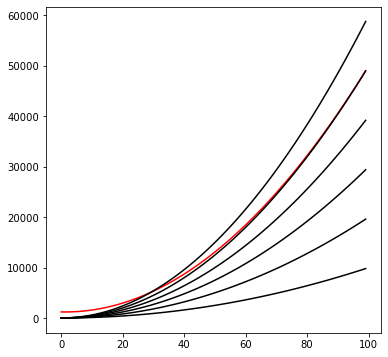

In [12]:
def f(n):
    return 5 * n**2 - 12 * n + 1200

def g(n):
    return n**2

N = 100
xs = np.arange(N)

plt.plot(xs, f(xs), 'r')
plt.plot(xs, 1 * g(xs), 'k')
plt.plot(xs, 2 * g(xs), 'k')
plt.plot(xs, 3 * g(xs), 'k')
plt.plot(xs, 4 * g(xs), 'k')
plt.plot(xs, 5 * g(xs), 'k')
plt.plot(xs, 6 * g(xs), 'k')

Przykładowa funkcja $f(n) = 5n^2 - 12n + 1200 = \Theta(n^2)$ ponieważ $4n^2$ ogranicza od dołu, $6n^2$ zaś ogranicza od góry. Funkcja może być wyłącznie w jednej klasie $\Theta$.

Podstawowe klasy złożoności, od najwolniej rosnącej do najszybciej rosnącej to:

 - stała $O(1)$ - dla żadnego $n$ nie przekroczymy pewnej stałej wartości.
 - $O(\log\log{n})$ - rzadko spotykana, przykładem jest [drzewo van Emde Boasa](https://en.wikipedia.org/wiki/Van_Emde_Boas_tree).
 - logarytmiczna $O(\log{n})$ - gdy z każdym krokiem algorytmu zmniejszamy dziedzinę kilkukrotnie.
 - pierwiastkowa $O(\sqrt{n})$ - częsta, gdy potrzebujemy wyznaczyć statystykę zbioru lub przy sprawdzaniu, czy liczba jest liczbą pierwszą.
 - liniowa $O(n)$ - gdy musimy przejść po wszystkich elementach, pętla po $n$ elementach.
 - $O(n\log{n})$ - typowa dla algorytmów Dziel i Zwyciężaj.
 - kwadratowa $O(n^2)$ - gdy musimy porównać każdy element z każdym innym.
 - sześcienna $O(n^3)$ - pętla w pętli w pętli.
 - wykładnicza $O(c^n)$, gdzie $c$ jest jakąś stałą większą od $1$ - dla każdego elementu mamy kilka możliwości i musimy sprawdzić wszystkie kombinacje tych możliwości.
 - silniowa $O(n!)$ - musimy sprawdzić wszystkie możliwe uporządkowania listy.

###### $\log$ oznacza logarytm. Jest to funkcja taka, że $\log_ab=c\iff a^c = b$. Różnicą pomiędzy logarytmami o różnych podstawach ($\log_2$ i $\log_{10}$ dla przykładu) jest jedynie stała, przez którą je mnożymy, stąd w przypadku złożoności je opuszczamy i zapisujemy wyłącznie $\log$ bez podstawy.

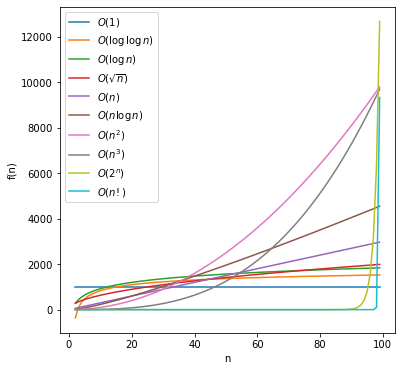

In [13]:
N = 100
xs = np.arange(2, N)
plt.plot(xs, 1000 + xs * 0, label=r"$O(1)$")
plt.plot(xs, 1000 * np.log(np.log(xs)), label=r"$O(\log\log n)$")
plt.plot(xs, 400 * np.log(xs), label=r"$O(\log n)$")
plt.plot(xs, 200 * np.sqrt(xs), label=r"$O(\sqrt{n})$")
plt.plot(xs, 30 * xs, label=r"$O(n)$")
plt.plot(xs, 10 * xs * np.log(xs), label=r"$O(n\log n)$")
plt.plot(xs, xs * xs, label=r"$O(n^2)$")
plt.plot(xs, 0.01 * xs ** 3.0, label=r"$O(n^3)$")
plt.plot(xs, 0.00000000000000000000000002 * 2.0 ** xs, label=r"$O(2^n)$")
plt.plot(xs, 0.1 ** 152 * sp.factorial(xs), label=r"$O(n!)$")
plt.legend()
plt.xlabel("n")
plt.ylabel("f(n)");

Powyższy wykres pokazuje kształt poszczególnych funkcji. Warto zauważyć, że kolejne funkcje są mnożone przez coraz mniejsze stałe. Przykładowo $n!$, żeby zmieściła się na wykresie, przemnożona jest przez $10^{-152}$, to jest liczbę, gdzie jedynka jest na $152$ miejscu po przecinku.

## Algorytmy naiwne

#### [BogoSort](https://en.wikipedia.org/wiki/Bogosort)

Wylosuj kolejność elementów i sprawdź, czy są posortowane. Powtarzaj tak długo, aż uzyskasz posortowaną listę. Złożoność $O(n\cdot n!)$

In [14]:
def is_sorted(data):
    return all([a <= b for a,b in zip(data, data[1:])])

def bogosort(data):
    while not is_sorted(data):
        shuffle(data)
    return data


In [15]:
data = [random() for i in range(10)]
bogosort(data)

[0.13908217542034385,
 0.2879082835329825,
 0.5489369213781021,
 0.6308145077540116,
 0.6405466758365566,
 0.6991859208408536,
 0.701721230514978,
 0.7464650886854048,
 0.7951946954461059,
 0.9638465999154127]

#### [Sortowanie przez wybieranie](https://en.wikipedia.org/wiki/Selection_sort)

Złożoność czasowa $O(n^2)$

`min` zwróci nam indeks minimum licząc od `i`-tego elementu, dlatego dodajemy `i`.

In [16]:
def selectSort(L):
    for i in range(len(L)):
        j = L[i:].index(min(L[i:])) + i
        L[i], L[j] = L[j], L[i]

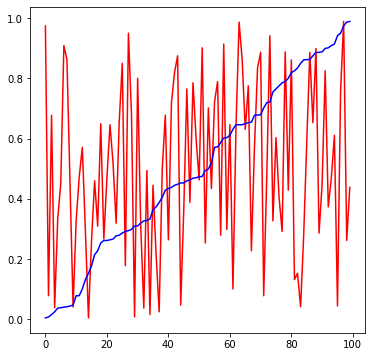

In [17]:
N = 100
l = [random() for x in range(N)]
plt.plot(l, 'r')
selectSort(l)
plt.plot(l, 'b');

#### [Sortowanie przez wstawianie](https://en.wikipedia.org/wiki/Insertion_sort)

Złożoność czasowa $O(n^2)$

In [18]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

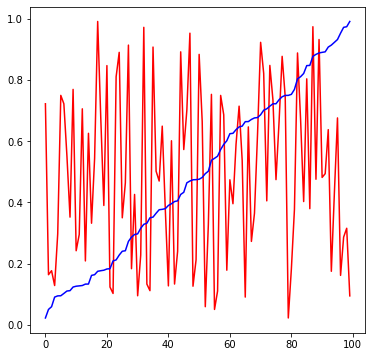

In [19]:
N = 100
l = np.random.random(N)
plt.plot(l, 'r')
insertionSort(l)
plt.plot(l, 'b');

#### [Sortowanie bąbelkowe](https://en.wikipedia.org/wiki/Bubble_sort)

Złożoność czasowa $O(n^2)$

In [20]:
def bubbleSort(arr):
    for i in range(len(arr) - 1):
        for j in range(len(arr) - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

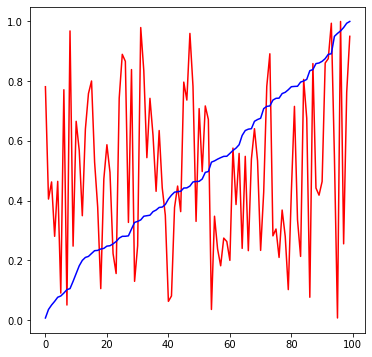

In [21]:
N = 100
l = np.random.random(N)
plt.plot(l, 'r')
bubbleSort(l)
plt.plot(l, 'b');

#### [Sortowanie przez zliczanie](https://en.wikipedia.org/wiki/Counting_sort)

Złożoność czasowa i pamięciowa $O(n + k)$, gdzie $k$ to `upper_bound - lower_bound + 1`.

In [22]:
def countingSort(arr, lower_bound, upper_bound):
    counters = [0 for _ in range(lower_bound, upper_bound + 1)]
    arr_cpy = [0 for _ in arr]
    for e in arr:
        if e != upper_bound:
            counters[e - lower_bound + 1] += 1
    for i in range(1, upper_bound - lower_bound + 1):
        counters[i] += counters[i - 1]
    for e in arr:
        arr_cpy[counters[e - lower_bound]] = e
        counters[e - lower_bound] += 1
    for i in range(len(arr)):
        arr[i] = arr_cpy[i]

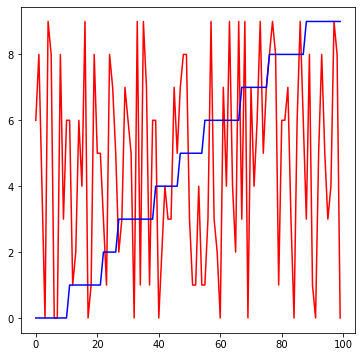

In [23]:
N = 100
l = list(np.random.randint(0, 10, N))
plt.plot(l, 'r')
countingSort(l, 0, 10)
plt.plot(l, 'b')
plt.show()

## [Dziel i zwyciężaj](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm)

### [Wyszukiwanie binarne](https://en.wikipedia.org/wiki/Binary_search_algorithm)

Zakładając, że `L` jest posortowana możemy znaleźć w niej wartość `value` w czasie $O(\log{n})$. W przypadku, gdy `value` nie znajduje się w `L` zwracamy `None`.

In [24]:
def binsearch(L, x):
    l, r = 0, len(L)
    while r - l > 0:
        m = (r + l) // 2
        if x < L[m]:
            r = m
        elif x > L[m]:
            l = m + 1
        else:
            return L[m]
    return None

### Sortowanie

#### Merge sorted lists

Złożoność czasowa $O(n)$

Na koniec albo `A` albo `B` jest pusta, więc `result + A + B` zwróci nam rezultat z resztą pozostałej listy na końcu.

In [25]:
def merge(A, B):
    result = []
    i, j = 0, 0
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            result.append(A[i])
            i += 1
        else:
            result.append(B[j])
            j += 1
    return result + A[i:] + B[j:]

#### [MergeSort](https://en.wikipedia.org/wiki/Merge_sort)

Złożoność czasowa $O(\log{n} \cdot (n + n)) \equiv O(n\log{n})$

Złożoność pamięciowa $O(n\log{n})$, da się $O(n)$

In [26]:
def mergeSort(L):
    if len(L) > 1:
        return merge(mergeSort(L[:len(L)//2]), mergeSort(L[len(L)//2:]))
    else:
        return L

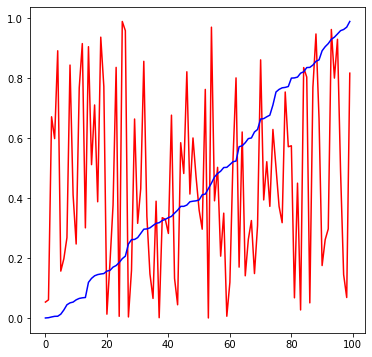

In [27]:
N = 100
l = list(np.random.rand(N))
plt.plot(l, 'r')
l = mergeSort(l)
plt.plot(l, 'b')
plt.show()

#### Merge sort bez rekurencji

In [28]:
def loopMergeSort(L):
    if len(L) <= 1:
        return L
    Ls = [[x] for x in L]
    while len(Ls) > 1:
        Ls2 = []
        for i in range(0, len(Ls) - 1, 2):
            Ls2.append(merge(Ls[i], Ls[i + 1]))
        if len(Ls) %2 == 1:
            Ls2.append(Ls[-1])
        Ls = Ls2
    return Ls[0]

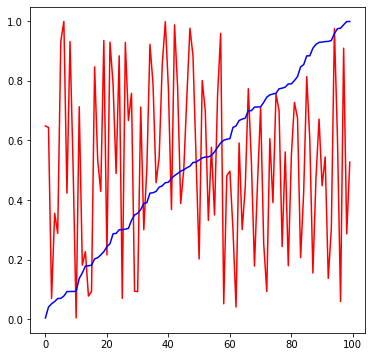

In [29]:
N = 100
l = list(np.random.rand(N))
plt.plot(l, 'r')
l = loopMergeSort(l)
plt.plot(l, 'b')
plt.show()

#### [QuickSort](https://en.wikipedia.org/wiki/Quicksort)

Napisany naiwnie, normalnie powinien być in-place. Złożoność czasowa $O(n^2)$

Złożoność pamięciowa powinna być $O(1)$, tutaj jest $O(n\log{n})$

##### Split by first element

Złożoność czasowa $O(n)$

In [30]:
def splitByFirst(L):
    first = L[0]
    A, B = [], []
    for element in L[1:]:
        if element < first:
            A.append(element)
        else:
            B.append(element)
    if len(A) == 0:
        A.append(first)
    else:
        B.append(first)
    return A, B

In [31]:
def quickSort(L):
    if len(L) > 1:
        A, B = splitByFirst(L)
        return quickSort(A) + quickSort(B)
    else:
        return L

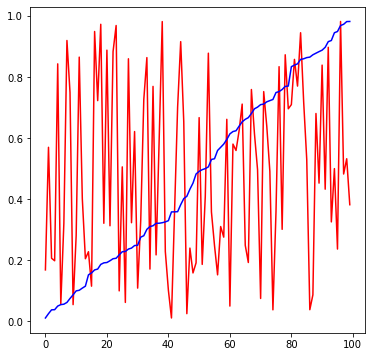

In [32]:
N = 100
l = list(np.random.rand(N))
plt.plot(l, 'r')
l = quickSort(l)
plt.plot(l, 'b')
plt.show()

Alternatywne implementacje quick sort, delikatniej szybsze.

In [33]:
def quickSort2(a):
    if len(a) <= 1:
        return a
    else:
        q = a[0]
        l, m, r = [], [], []
        for elem in a:
            if elem < q:
                l.append(elem)
            elif elem > q:
                r.append(elem)
            else:
                m.append(elem)
        return quickSort2(l) + m + quickSort2(r)

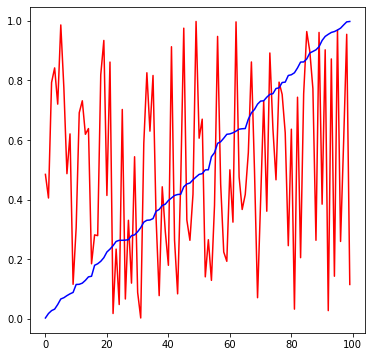

In [34]:
N = 100
l = list(np.random.rand(N))
plt.plot(l, 'r')
l = quickSort2(l)
plt.plot(l, 'b')
plt.show()

In [35]:
def quickSort3(arr):
    if len(arr) <= 1:
        return arr
    mid = arr[len(arr) // 2]
    lesser = [x for x in arr if x < mid]
    middle = [x for x in arr if x == mid]
    greater = [x for x in arr if x > mid]

    return quickSort3(lesser) + middle + quickSort3(greater)

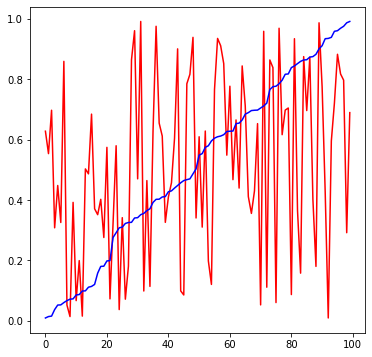

In [36]:
N = 100
l = [random() for i in range(N)]
plt.plot(l, 'r')
l = quickSort3(l)
plt.plot(l, 'b')
plt.show()

#### Porównanie

`sst` - select sort times - select sort sortuje in-place, co oznacza, że lista `l` będzie posortowana. Dlatego przygotowujemy oddzielnie `npl` (numpy list), którą rzutujemy na standardową listę pythonową dla każdego algorytmu do posortowania.

`mst` - merge sort times

`lmst` - loop merge sort times - merge sort bez rekurencji

`qst` - quick sort times

`pst` - [python standard](https://docs.python.org/3/howto/sorting.html) sort times - sorted jest funkcją leniwą, co oznacza, że zwraca nam jedynie przepis na sortowanie listy. Sama lista zostanie posortowana dopiero wtedy, gdy będziemy się odwoływali do jej elementów. Rzutowanie na `list` wystarcza do "zgorliwienia".

`nst` - [numpy sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) times

In [37]:
sst  = []
ist  = []
bst  = []
mst  = []
lmst = []
qst  = []
qst2 = []
qst3 = []
pst  = []
nst  = []

ns = range(1000,10000,1000)

for n in ns:
    npl = np.random.random(n)
    l = list(npl)
    start = default_timer()
    selectSort(l)
    sst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    insertionSort(l)
    ist.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    bubbleSort(l)
    bst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    mergeSort(l)
    mst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    loopMergeSort(l)
    lmst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort(l)
    qst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort2(l)
    qst2.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort3(l)
    qst3.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    sorted(l)
    pst.append(default_timer() - start)

    start = default_timer()
    np.sort(npl)
    nst.append(default_timer() - start)


Żeby zobaczyć porównanie algorytmów bez `select sort` w lepszej rozdzielczości, zakomentuj pierwszą linijkę.

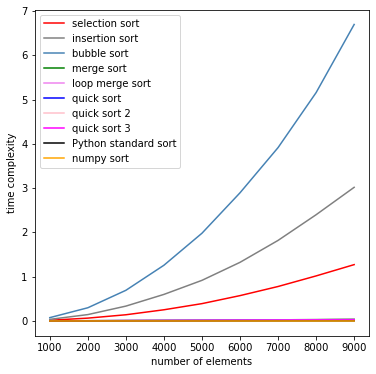

In [38]:
ns = range(1000,10000,1000)
plt.plot(ns, sst , 'r'        , label='selection sort')
plt.plot(ns, ist , 'gray'     , label='insertion sort')
plt.plot(ns, bst , 'steelblue', label='bubble sort')
plt.plot(ns, mst , 'g'        , label='merge sort')
plt.plot(ns, lmst, 'violet'   , label='loop merge sort')
plt.plot(ns, qst , 'b'        , label='quick sort')
plt.plot(ns, qst2, 'pink'     , label='quick sort 2')
plt.plot(ns, qst3, 'fuchsia'  , label='quick sort 3')
plt.plot(ns, pst , 'black'    , label='Python standard sort')
plt.plot(ns, nst , 'orange'   , label='numpy sort')
plt.legend(loc="upper left")
plt.xlabel('number of elements')
plt.ylabel('time complexity')
plt.show()

### [Szybkie potęgowanie](https://en.wikipedia.org/wiki/Exponentiation_by_squaring)

Złożoność czasowa $O(\log{n})$

$3^{10}$

$3 \cdot 3 \cdot 3 \cdot 3 \cdot 3 \cdot 3 \cdot 3 \cdot 3 \cdot 3 \cdot 3$

$(3 \cdot 3) \cdot (3 \cdot 3) \cdot (3 \cdot 3) \cdot (3 \cdot 3) \cdot (3 \cdot 3)$

$9 \cdot 9 \cdot 9 \cdot 9 \cdot 9$

$(9 \cdot 9) \cdot (9 \cdot 9) \cdot 9$

$81 \cdot 81 \cdot 9$

$(81 \cdot 81) \cdot 9$

$6561 \cdot 9$

$59049$

In [39]:
def fastPower(a, n):
    result = 1
    while n > 0:
        if n % 2 == 1:
            result *= a
        n //= 2
        a *= a
    return result

In [40]:
def fastPower2(a,n):
    if (n == 0):
        return 1
    x = fastPower2(a,(n//2))
    if (n % 2 == 0):
        return x*x
    else:
        return a*x*x

### Szybki Fibonacci

$$\begin{pmatrix}a & b\\ c & d\end{pmatrix} \cdot \begin{pmatrix}e & f\\ g & h\end{pmatrix} = \begin{pmatrix}ae + bg & af + bh \\ ce + dg & cf + dh\end{pmatrix}$$

`a, b, c, d` odpowiada macierzy $ \begin{pmatrix}a & b\\ c & d\end{pmatrix} $.

In [41]:
def matMul(A, B):
    a, b, c, d = A
    e, f, g, h = B
    return (a * e + b * g), (a * f + b * h), (c * e + d * g), (c * f + d * h)

$ \begin{pmatrix}1 & 0\\ 0 & 1\end{pmatrix} $ jest macierzą identyczności i odpowiada liczbie $1$.

In [42]:
def fastMatPower(M, n):
    result = 1, 0, 0, 1
    while n > 0:
        if n % 2 == 1:
            result = matMul(result, M)
        n //= 2
        M = matMul(M, M)
    return result

In [43]:
def fastMatPower2(M,n):
    if (n == 0):
        return 1, 0, 0, 1
    x = fastPower2(M,(n//2))
    if (n % 2 == 0):
        return matMul(x, x)
    else:
        return matMul(M, matMul(x, x))

$$ \begin{pmatrix} F_{n + 2} & F_{n + 1} \\ F_{n + 1} & F_n \end{pmatrix} \cdot \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}^k = \begin{pmatrix} F_{n + 2 + k} & F_{n + 1 + k} \\ F_{n + 1 + k} & F_{n + k} \end{pmatrix} $$

$$ \begin{pmatrix} F_1 & F_0 \\ F_0 & F_{-1} \end{pmatrix} \cdot \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}^k = \begin{pmatrix} F_{1 + k} & F_k \\ F_k & F_{k - 1} \end{pmatrix} $$

$$ \begin{pmatrix} F_1 & F_0 \\ F_0 & F_{-1} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$

In [44]:
def fastFibonacci(n):
    M = 1.0, 1.0, 1.0, 0.0
    _, Fn, _, _ = fastMatPower(M, n)
    return Fn

In [45]:
def fastNumpyFibonacci(n):
    return np.linalg.matrix_power(np.array([[1, 1], [1, 0]]), n)[0,1]

## [Algorytmy zachłanne](https://en.wikipedia.org/wiki/Greedy_algorithm)

#### [Problem komiwojażera](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

Rozwiązanie zachłanne $O(n^3)$

`N` - liczba miast

`towns` - losujemy współrzędne dla miast

`best_cost` - najlepszy jak dotąd koszt (suma kwadratów odległości) ścieżki. Domyślnie $\infty$ by dowolna ścieżka była lepsza od domyślnej.

`best_path` - najlepsza dotąd znaleziona ścieżka

Dla każdego miasta rozpatrujemy ścieżkę rozpoczynającą się z niego. Mając miasto znajdźmy mu najbliższe, to jest takie, że kwadrat odległości $(x_1 - x_2)^2 + (y_1 - y_2)^2$ był jak najmniejszy. Żeby nie rozpatrywać już miast odwiedzonych nadpisujemy je wartością $\infty$. Po znalezieniu najbliższego miasta szukamy kolejnego zaczynając od niego.

Dla każdego miasta sprawdzamy, czy nasza aktualna ścieżka nie jest lepsza od dotychczasowej najlepszej. Jeśli tak, to zapamiętujemy ją.

In [46]:
import numpy as np
from math import inf
N = 1000

towns = np.random.random((2, N))

best_cost = inf
best_path = []

for i in range(N):
    xs = np.copy(towns[0,:])
    ys = np.copy(towns[1,:])
    path = [i]
    cost = 0.0
    current = i
    for j in range(N - 1):
        x = xs[current]
        y = ys[current]
        xs[current] = inf
        ys[current] = inf
        dists = (xs - x) ** 2. + (ys - y) ** 2.
        current = np.argmin(dists)
        path.append(current)
        cost += dists[current] ** 0.5
    if cost < best_cost:
        best_path = path
        best_cost = cost

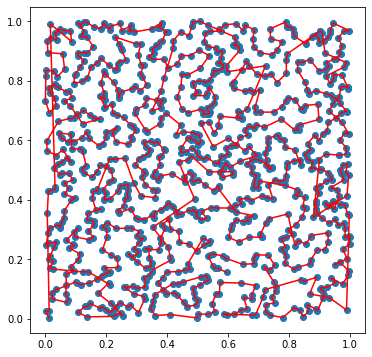

In [47]:
xs = towns[0,:]
ys = towns[1,:]
xs = xs[best_path]
ys = ys[best_path]

plt.plot(xs, ys, 'r')
plt.scatter(xs, ys)
plt.show()

#### Rozwiązanie bez numpy

Tworzymy dwie tablice losowych współrzędnych `x` i `y`. Wybieramy początkowe miasto (`current`) i wyznaczamy odległości do innych miast. Żeby nie uwzględniać tego miasta zastępujemy jego współrzędne przez $\left(\infty,\infty\right)$. Wybieramy miasto, które jest najbliżej naszego.

In [48]:
from random import random
N = 200

xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

old_xs = list(xs)
old_ys = list(ys)

In [49]:
from math import inf
current = 5

xs = list(old_xs)
ys = list(old_ys)
x, y = xs[current], ys[current]
xs[current], ys[current] = inf, inf

dists = [((x - xs[i]) ** 2. + (y - ys[i]) ** 2.) ** 0.5 for i in range(N)]
dists.index(min(dists))

100

Zamiast wyznaczać pojedyńcze najbliższe miasto stwórzmy teraz pętlę, która będzie dla każdego kolejnego miasta wyznaczała jego najbliższego sąsiada niebędącego miastem, które już odwiedziliśmy. Żeby ignorować miasta, w których już byliśmy zamieniamy ich współrzędne na $\left( \infty, \infty \right)$. Ścieżka rozpoczyna się miastem `current`.

In [50]:
current = 3
path = [current]

xs = list(old_xs)
ys = list(old_ys)

for j in range(N - 1):
    x, y = xs[current], ys[current]
    xs[current], ys[current] = inf, inf

    dists = [((x - xs[i]) ** 2. + (y - ys[i]) ** 2.) ** 0.5 for i in range(N)]
    current = dists.index(min(dists))
    path.append(current)


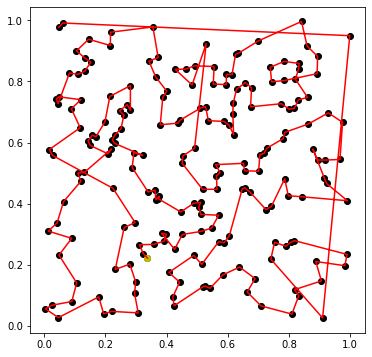

In [51]:
from matplotlib import pyplot as plt
nxs = [old_xs[i] for i in path]
nys = [old_ys[i] for i in path]
fsx, fsy = nxs[0], nys[0]

plt.plot(nxs, nys, 'r')
plt.scatter(nxs, nys, c='k')
plt.scatter([fsx], [fsy], c='y')
plt.show()

Wyznaczmy teraz najlepsze trasy dla każdego miasta jako początku. Porównujmy koszt każdej ścieżki z aktualną najlepszą, jeśli nasz koszt jest niższy, to podmieńmy koszt i ścieżkę.

In [52]:
best_cost = inf

best_path = []

for current in range(N):

    path = [current]
    cost = 0
    xs = list(old_xs)
    ys = list(old_ys)

    for j in range(N - 1):
        x, y = xs[current], ys[current]
        xs[current], ys[current] = inf, inf

        dists = [((x - xs[i]) ** 2. + (y - ys[i]) ** 2.) ** 0.5 for i in range(N)]
        current = dists.index(min(dists))
        cost += min(dists)
        path.append(current)
    if cost < best_cost:
        best_path = path
        best_cost = cost



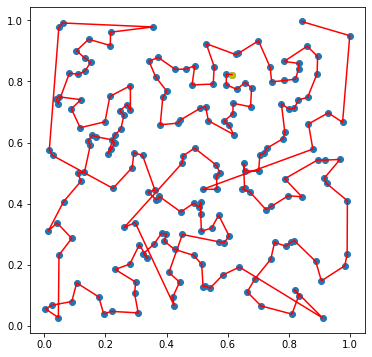

In [53]:
nxs = [old_xs[i] for i in best_path]
nys = [old_ys[i] for i in best_path]
fsx, fsy = nxs[0], nys[0]


plt.plot(nxs, nys, 'r')
plt.scatter(nxs, nys)
plt.scatter([fsx], [fsy], c='y')
plt.show()

## [Metoda Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method)

#### Wyznaczanie [$\pi$](https://en.wikipedia.org/wiki/Pi)

Wylosuj `N` punktów na obszarze kwadratu $\left[ 0 \ldots 1, 0 \ldots 1 \right]$. Pole kwadratu to $r^2$, gdzie $r=1$, czyli $1$. Pole ćwiartki koła w nim zawartej to $\frac{\pi r^2}{4}$. Stąd $\frac{\pi}{4}$ to stosunek powierzchni koła do kwadratu, a więc i prawdopodobieństwo trafienia w ćwiartkę losowymi punktami.

In [54]:
from math import pi
N = 10000
xs = np.random.random(N)
ys = np.random.random(N)

inCircle = xs * xs + ys * ys <= 1.0
4 * np.average(inCircle), pi

(3.1392, 3.141592653589793)

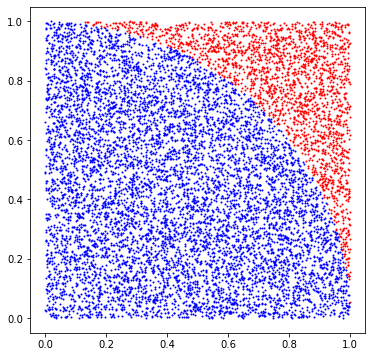

In [55]:
oxs = xs[~inCircle]
oys = ys[~inCircle]

cxs = xs[inCircle]
cys = ys[inCircle]

plt.scatter(oxs, oys, 1, c='r')
plt.scatter(cxs, cys, 1, c='b')
plt.show()

## [Podejście gorliwe a leniwe](https://en.wikipedia.org/wiki/Evaluation_strategy)

Czasami, zamiast od razu liczyć wynik, bardziej opłacalne może okazać się samo przygotowanie instrukcji liczenia oraz wyznaczenie wartości dopiero wtedy, kiedy jest nam potrzebna. Przykładowo, możemy chcieć wykonać jakieś skomplikowane działanie na bardzo długiej liście a następnie wyszukać pierwszy element, który spełnia pewien predykat. Zamiast wykonania operacji na całej liście a dopiero później szukania wartości, możemy na bieżąco liczyć i sprawdzać wartości. Podejście takie nazywamy leniwym.

In [56]:
from timeit import default_timer

start = default_timer()
l = range(100000000)
print(default_timer() - start)

display(l)

start = default_timer()
l2 = [2 * x for i in l]
print(default_timer() - start)

start = default_timer()
l = map(lambda x: x ** 2, l)
l = map(lambda x: x % 10000 == 0 and x != 0, l)
print(default_timer() - start)

display(l)

start = default_timer()
result = any(l)
print(default_timer() - start)

print(result)

0.00024539999999717566


range(0, 100000000)

8.378005599999995
9.829999999055872e-05


7.349999999917145e-05
True


Operacje takie jak `range`, `map`, `zip` i wiele innych wykonywane są leniwie. To znaczy, że zaczną wykonywać się dopiero, gdy będą potrzebne ich wartości. Stąd bardzo krótki czas wykonania w porównaniu do zwykłej pętli.

Operacja `any` wykonuje się do pierwszego wystąpienia wartości `True` lub do samego końca listy.

Analogicznie, `all` wykonuje się do pierwszego wystąpienia wartości `False` lub do samego końca listy.

Leniwe operacje, zamiast zwracać listę, zwracają obiekt odpowiadający tej operacji. Żeby zewaluować te operacje, możemy zrzutować je z pomocą `list`.

In [57]:
start = default_timer()
l = range(100000000)
print(default_timer() - start)

start = default_timer()
l = list(l)
print(default_timer() - start)

3.949999999974807e-05
1.5745890000000031


In [58]:
l = [1, 2, 3, 4, 5]
l2 = map(lambda x: 2 * x, l)
l[2] = 0
list(l2)

[2, 4, 0, 8, 10]

## [Kolekcje](https://en.wikipedia.org/wiki/Collection_(abstract_data_type))

Podstawowymi operacjami, których powinniśmy spodziewać się po kolekcjach jest dodanie elementu (`add`, `append`, `insert`, `push`, `enque`), usunięcie elementu (`delete`, `remove`, `pop`), sprawdzenie, czy element znajduje się w kolekcji (`contains`, `find`, `exists`, `in`), pobranie wartości elementu (`get`) i ustawienie wartości elementu (`set`).

#### [Tablice/listy/wektory](https://en.wikipedia.org/wiki/Array_data_structure)

In [59]:
display([1, 2, 3, 4])
display([])
display([1, 2.0, "Ala ma kota"])
display(list())
display(list("Ala ma kota"))
display([[], [1, 2], [[], [1, 2, 3]]])

[1, 2, 3, 4]

[]

[1, 2.0, 'Ala ma kota']

[]

['A', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a']

[[], [1, 2], [[], [1, 2, 3]]]

Operacja dodania na koniec tablicy działa w czasie $O(1)$. Co jakiś czas tablica musi zostać przealokowana i operacja ta zajmuje $O(n)$, wykonujemy ją jednak rzadko i złożoność ta [amortyzuje](https://en.wikipedia.org/wiki/Amortized_analysis) się do $O(1)$.

Operacja dodania na początku tablicy działa w czasie $O(n)$ ponieważ musimy przesunąć wszystkie następne elementy o $1$ do przodu. Operacja dodania na $i$-tą pozycję działa w czasie $O(n - i)$.

Operacja usunięcia z końca tablicy działa w czasie $O(1)$, z początku zaś w czasie $O(n)$ ponieważ musimy przesunąć wszystkie następujące elementy o $1$ wstecz. Usunięcie z $i$-tej pozycji wykonuje się w czasie $O(n - i)$.

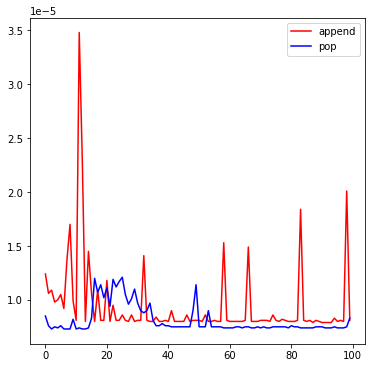

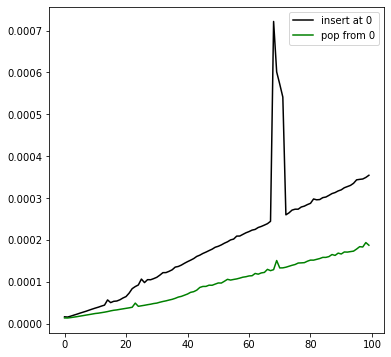

In [60]:
N = 100
batchsize = 100
l = []
appTimes = []
popTimes = []
insTimes = []
zpopTimes = []

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.append(i)
    appTimes.append(default_timer() - start)

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.pop()
    popTimes.append(default_timer() - start)

popTimes.reverse()

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.insert(0, i)
    insTimes.append(default_timer() - start)

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.pop(0)
    zpopTimes.append(default_timer() - start)

zpopTimes.reverse()

plt.plot(appTimes, 'r', label='append')
plt.plot(popTimes, 'b', label='pop')
plt.legend()
plt.show()
plt.plot(insTimes, 'k', label='insert at 0')
plt.plot(zpopTimes, 'g', label='pop from 0')
plt.legend()
plt.show()

#### Wektory w numpy

Wektory w `numpy`, w przeciwieństwie do standardowego `list` w pythonie, nie są tablicami wskaźników a ciągiem danych. Stąd typ danych musi być określony explicite w momencie tworzenia wektora. Tekst będzie reprezentowany przez typ `<Un`, gdzie `n` jest długością tekstu, wielotypowa tablica będzie tablicą typu `object`. Możemy tworzyć tablice wielowymiarowe, acz muszą one składać się z podtablic o tej samej długości i typie.

`ndarray` jest statycznego rozmiaru i dodanie nowego elementu tworzy nowy, niezależny wektor.

In [61]:
display(np.array(list("Ala ma kota")))
display(np.array(["Ala ma kota", "Sierotka ma rysia"]))
display(np.array(["Ala ma kota", "Sierotka ma rysia"], dtype='<U12'))
display(np.array([1, 2, 298], dtype='int8'))
display(np.array([1, 2, 3.]))
display(np.array([[1], [2], [3.]]))
display(np.array([[1], [2], [3., 4]]))
display(np.array([1, 2, []]))

array(['A', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a'], dtype='<U1')

array(['Ala ma kota', 'Sierotka ma rysia'], dtype='<U17')

array(['Ala ma kota', 'Sierotka ma '], dtype='<U12')

array([ 1,  2, 42], dtype=int8)

array([1., 2., 3.])

array([[1.],
       [2.],
       [3.]])

C:\Users\micha\AppData\Local\Temp/ipykernel_20628/2699537014.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  display(np.array([[1], [2], [3., 4]]))


array([list([1]), list([2]), list([3.0, 4])], dtype=object)

C:\Users\micha\AppData\Local\Temp/ipykernel_20628/2699537014.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  display(np.array([1, 2, []]))


array([1, 2, list([])], dtype=object)

#### Porównanie list vs np.ndarray

##### [map](https://en.wikipedia.org/wiki/Map_(mathematics))

Wykres z logarytmiczną osią pionową.

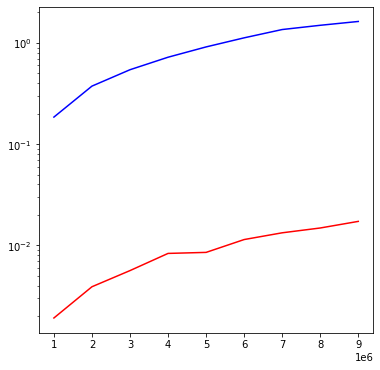

In [62]:
ns = range(1000000, 10000000, 1000000)

nptimes = []
sttimes = []

for n in ns:
    npl = np.random.random(n)
    l = list(npl)

    start = default_timer()
    npl * 2.0
    nptimes.append(default_timer() - start)

    start = default_timer()
    [2 * x for x in l]
    sttimes.append(default_timer() - start)

plt.plot(list(ns), nptimes, 'r')
plt.plot(list(ns), sttimes, 'b')
plt.yscale('log')
plt.show()

##### `in`

In [63]:
npl = np.random.random(1000000)
l = list(npl)

start = default_timer()
-1 in npl
print(default_timer() - start)

start = default_timer()
-1 in l
print(default_timer() - start)

0.0014043000000043548
0.14052300000000173


#### [Kolejka](https://en.wikipedia.org/wiki/Queue_(abstract_data_type))

Struktura [FIFO](https://en.wikipedia.org/wiki/FIFO_(computing_and_electronics)) (First In First Out).

Dodawanie na koniec jak i na początek w czasie $O(1)$. Usuwanie z początku jak i z końca w czasie $O(1)$. Dodawanie i usuwanie ze środka za pomocą `append` i `pop` w czasie $O(n - i)$ a za pomocą `appendleft` i `popleft` w czasie $O(i)$.


Wykresy przedstawiają czas od rozpoczęcia pętli, oznacza to, że jeśli wykres jest liniowy, to operacja jest w czasie stałym, bo po $n$ krokach wykonaliśmy $O(n)$ operacji, czyli średnio stałą liczbę operacji na krok. Zauważ, że operacje `pop` i `popleft` są szybsze od `append` i `appendleft`.

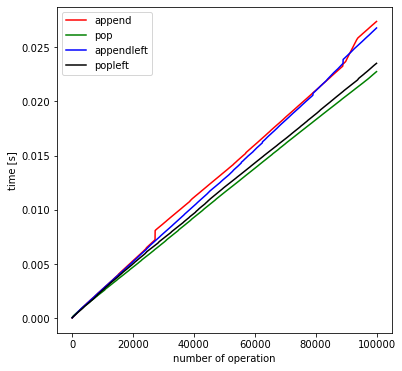

In [64]:
N = 100000
q = deque()
times = []

start = default_timer()
for i in range(N):
    q.append(i)
    times.append(default_timer() - start)

plt.plot(times, 'r', label='append')

times = []

start = default_timer()
for i in range(N):
    q.pop()
    times.append(default_timer() - start)

plt.plot(times, 'g', label='pop')

q = deque()
times = []

start = default_timer()
for i in range(N):
    q.appendleft(i)
    times.append(default_timer() - start)

plt.plot(times, 'b', label='appendleft')

times = []

start = default_timer()
for i in range(N):
    q.popleft()
    times.append(default_timer() - start)

plt.plot(times, 'k', label='popleft')
plt.ylabel('time [s]')
plt.xlabel('number of operation')
plt.legend()

Operacje `append` i `pop` na liście i na kolejce działają w podobnym czasie.

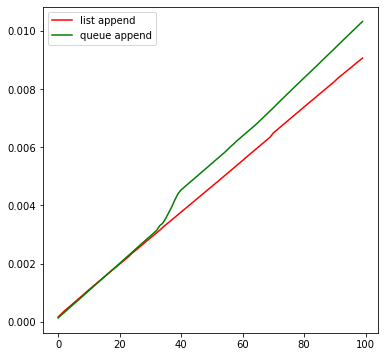

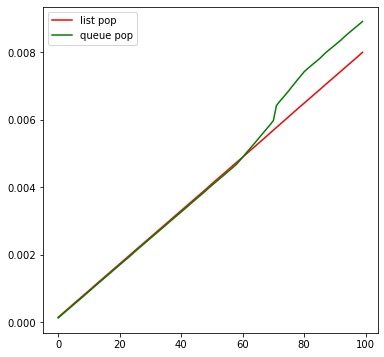

In [65]:
N = 100
batchsize = 1000

l = []
ltimes = []
q = deque()
qtimes = []

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        l.append(i)
    ltimes.append(default_timer() - start)

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        q.append(i)
    qtimes.append(default_timer() - start)

plt.plot(ltimes, 'r', label='list append')
plt.plot(qtimes, 'g', label='queue append')
plt.legend()
plt.show()

ltimes = []
qtimes = []

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        l.pop()
    ltimes.append(default_timer() - start)

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        q.pop()
    qtimes.append(default_timer() - start)

plt.plot(ltimes, 'r', label='list pop')
plt.plot(qtimes, 'g', label='queue pop')
plt.legend()
plt.show()



#### [Listy linkowane/wiązane](https://en.wikipedia.org/wiki/Linked_list)

Lista składa się z węzłów zawierających wartość i wskaźnik na kolejny węzeł (lub `None`, gdy jest to ostatni węzeł). Obiekt listy zawiera referencję do głowy.

In [66]:
class Node:
    def __init__(self, value, next = None):
        self.value = value
        self.next = next

    def isLast(self):
        return self.next == None

    def __repr__(self) -> str:
        return f'Node(value: {self.value}) -> {self.next}'

class LinkedList:
    def __init__(self, head = None):
        self.head = head

    def __repr__(self) -> str:
        return f'LinkedList: {self.head}'

    def insert(self, index, value):
        if index == 0:
            self.head = Node(value, self.head)
        else:
            current = self.head
            for _ in range(index - 1):
                current = self.next
            current.next = Node(value, current.next)

    def remove(self, index):
        if index == 0:
            self.head = self.head.next
        else:
            current = self.head
            for _ in range(index - 1):
                current = self.next
            current.next = current.next.next

    def get(self, index):
        current = self.head
        for _ in range(index):
            current = current.next
        return current.value

    def set(self, index, value):
        current = self.head
        for _ in range(index):
            current = current.next
        current.value = value

In [67]:
def get(l, i):
    head, tail = l
    if i == 0:
        return head
    else:
        return get(tail, i - 1)

def setv(l, i, v):
    head, tail = l
    if i == 0:
        return (v, tail)
    else:
        return (head, setv(tail, i - 1, v))

def remove(l, i):
    head, tail = l
    if i == 0:
        return tail
    else:
        return (head, remove(tail, i - 1))

def insert(l, i, v):
    if i == 0:
        return (v, l)
    else:
        head, tail = l
        return (head, insert(tail, i - 1, v))

def fold(l, f, acc):
    if l == None:
        return acc
    head, tail = l
    return fold(tail, f, f(head, acc))

#### [Zbiory](https://en.wikipedia.org/wiki/Set_(abstract_data_type))

Zbiór to nieuporządkowana struktura danych. Dodawanie ([add](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)), usuwanie ([discard](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)) i testowanie zawierania ([in](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)) mają złożoność $O(1)$.

Zbiory przechowują elementy w tak zwanej [hash-liście](https://en.wikipedia.org/wiki/Hash_list), to jest przypisują każdemu elementowi charakterystyczny klucz, który zarazem jest indeksem (lub instrukcją stworzenia grupy indeksów do wyszukiwania w listach zagnieżdżonych) w tablicy. Dzięki temu rozwiązaniu wyszukiwanie elementu odbywa się natychmiastowo.

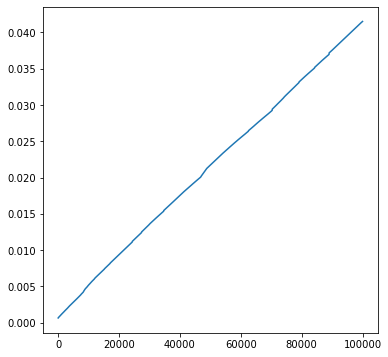

In [68]:
l = np.random.random(100000)
s = set(l)
times = []
start = default_timer()
c = 0
for i in np.random.random(100000):
    i in s
    times.append(default_timer() - start)

plt.plot(times)
plt.show()

In [69]:
l = []
s = set([])

c = 0
start = default_timer()
for i in range(100000):
    l.append(i)
print(default_timer() - start)

c = 0
start = default_timer()
for i in range(100000):
    s.add(i)
print(default_timer() - start)

0.010181299999999283
0.013493400000001543


In [70]:
l = list(np.random.random(1000000))
s = set(l)
start = default_timer()
-1 in l
print(default_timer() - start)
start = default_timer()
-1 in s
print(default_timer() - start)


0.1295975000000027
4.560000000708442e-05


#### [Kolejka priorytetowa](https://en.wikipedia.org/wiki/Priority_queue)

Struktura działająca na bazie [kopca](https://en.wikipedia.org/wiki/Heap_(data_structure)). W korzeniu kopca utrzymywane jest minimum (dla min-kopców, maksimum dla max-kopców). Dodawanie nowego elementu (`heappush`) polega na podczepieniu na końcu kopca i pchaniu do góry aż do znalezienia miejsca, gdzie nie zaburzamy porządku. Operacja ta działa pesymistycznie w czasie $O(\log{n})$. Usuwanie z kopca (`heappop`) zwraca minimum (lub maksimum) i w jego miejsce wstawia kolejne. Operacja ta działa pesymistycznie w czasie $O(\log{n})$.

Kopce można tworzyć za pomocą operacji `heapify` w czasie $O(n)$.

In [71]:
class Heap:
    def __init__(self) -> None:
        self.l = []

    def max(self):
        return self.l[0]

    def push(self, v):
        i = len(self.l)
        self.l.append(v)
        while i > 0 and v > self.l[(i - 1) // 2]:
            self.l[i], self.l[(i - 1) // 2] = self.l[(i - 1) // 2], self.l[i]
            i = (i - 1) // 2

    def pop(self):
        result = self.max()
        self.l[0] = self.l.pop()
        i = 0
        left, right = 1, 2
        while right < len(self.l) and (self.l[i] < self.l[left] or self.l[i] < self.l[right]):
            if self.l[left] > self.l[right]:
                self.l[left], self.l[i] = self.l[i], self.l[left]
                i = left
            else:
                self.l[right], self.l[i] = self.l[i], self.l[right]
                i = right
            left, right = i * 2 + 1, i * 2 + 2
        if left < len(self.l) and self.l[left] > self.l[i]:
            self.l[i], self.l[left] = self.l[left], self.l[i]
        return result

    def __repr__(self) -> str:
        n = 1
        txt = ""
        while n < 2 * len(self.l):
            for i in range(n):
                if n - 1 + i < len(self.l):
                    txt += f"{self.l[n - 1 + i]} "
            n *= 2
            txt += "\n"
        return txt

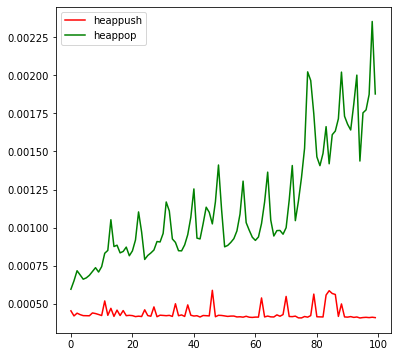

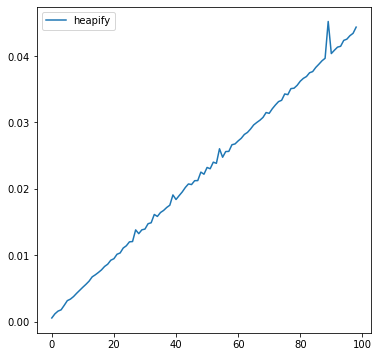

In [72]:
l = np.random.random(100000)

h = []

times = []
counter = 0
for e in l:
    if counter % 1000 == 0:
        start = default_timer()
    heappush(h, e)
    if counter % 1000 == 999:
        times.append(default_timer() - start)
    counter += 1

plt.plot(times, 'r', label='heappush')
times = []

while h:
    if counter % 1000 == 0:
        start = default_timer()
    heappop(h)
    if counter % 1000 == 999:
        times.append(default_timer() - start)
    counter += 1

times.reverse()
plt.plot(times, 'g', label='heappop')
plt.legend()
plt.show()

times = []
for i in range(10000, 1000000, 10000):
    l = list(np.random.random(i))
    start = default_timer()
    heapify(l)
    times.append(default_timer() - start)

plt.plot(times, label='heapify')
plt.legend();

##### [Heapsort](https://en.wikipedia.org/wiki/Heapsort)

Stwórz kopiec ([heapify](https://docs.python.org/3/library/heapq.html), złożoność $O(n)$) a następnie wyciągnij z niego po kolei najmniejsze elementy ([heappop](https://docs.python.org/3/library/heapq.html), złożoność pojedyńczej operacji to $O(\log n)$, łącznie $O(n\log n)$). Otrzymana lista będzie posortowana

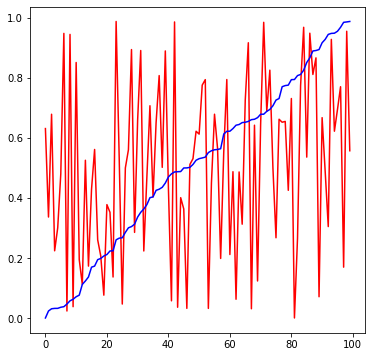

In [73]:
N = 100
l = list(np.random.random(N))
plt.plot(l, 'r')
heapify(l)
l_sorted = [heappop(l) for _ in range(N)]
plt.plot(l_sorted, 'b')
plt.show()

##### [Kopiec Fibonacciego](https://en.wikipedia.org/wiki/Fibonacci_heap)

###### Kopia kodu z repozytorium [Daniela Borowskiego](https://github.com/danielborowski/fibonacci-heap-python)

In [74]:
class FibonacciHeap:

    # internal node class
    class Node:
        def __init__(self, key, value):
            self.key = key
            self.value = value
            self.parent = self.child = self.left = self.right = None
            self.degree = 0
            self.mark = False

    # function to iterate through a doubly linked list
    def iterate(self, head):
        node = stop = head
        flag = False
        while True:
            if node == stop and flag is True:
                break
            elif node == stop:
                flag = True
            yield node
            node = node.right

    # pointer to the head and minimum node in the root list
    root_list, min_node = None, None

    # maintain total node count in full fibonacci heap
    total_nodes = 0

    # return min node in O(1) time
    def find_min(self):
        return self.min_node

    # extract (delete) the min node from the heap in O(log n) time
    # amortized cost analysis can be found here (http://bit.ly/1ow1Clm)
    def extract_min(self):
        z = self.min_node
        if z is not None:
            if z.child is not None:
                # attach child nodes to root list
                children = [x for x in self.iterate(z.child)]
                for i in range(0, len(children)):
                    self.merge_with_root_list(children[i])
                    children[i].parent = None
            self.remove_from_root_list(z)
            # set new min node in heap
            if z == z.right:
                self.min_node = self.root_list = None
            else:
                self.min_node = z.right
                self.consolidate()
            self.total_nodes -= 1
        return z

    # insert new node into the unordered root list in O(1) time
    # returns the node so that it can be used for decrease_key later
    def insert(self, key, value=None):
        n = self.Node(key, value)
        n.left = n.right = n
        self.merge_with_root_list(n)
        if self.min_node is None or n.key < self.min_node.key:
            self.min_node = n
        self.total_nodes += 1
        return n

    # modify the key of some node in the heap in O(1) time
    def decrease_key(self, x, k):
        if k > x.key:
            return None
        x.key = k
        y = x.parent
        if y is not None and x.key < y.key:
            self.cut(x, y)
            self.cascading_cut(y)
        if x.key < self.min_node.key:
            self.min_node = x

    # merge two fibonacci heaps in O(1) time by concatenating the root lists
    # the root of the new root list becomes equal to the first list and the second
    # list is simply appended to the end (then the proper min node is determined)
    def merge(self, h2):
        H = FibonacciHeap()
        H.root_list, H.min_node = self.root_list, self.min_node
        # fix pointers when merging the two heaps
        last = h2.root_list.left
        h2.root_list.left = H.root_list.left
        H.root_list.left.right = h2.root_list
        H.root_list.left = last
        H.root_list.left.right = H.root_list
        # update min node if needed
        if h2.min_node.key < H.min_node.key:
            H.min_node = h2.min_node
        # update total nodes
        H.total_nodes = self.total_nodes + h2.total_nodes
        return H

    # if a child node becomes smaller than its parent node we
    # cut this child node off and bring it up to the root list
    def cut(self, x, y):
        self.remove_from_child_list(y, x)
        y.degree -= 1
        self.merge_with_root_list(x)
        x.parent = None
        x.mark = False

    # cascading cut of parent node to obtain good time bounds
    def cascading_cut(self, y):
        z = y.parent
        if z is not None:
            if y.mark is False:
                y.mark = True
            else:
                self.cut(y, z)
                self.cascading_cut(z)

    # combine root nodes of equal degree to consolidate the heap
    # by creating a list of unordered binomial trees
    def consolidate(self):
        A = [None] * int(log(self.total_nodes) * 2)
        nodes = [w for w in self.iterate(self.root_list)]
        for w in range(0, len(nodes)):
            x = nodes[w]
            d = x.degree
            while A[d] != None:
                y = A[d]
                if x.key > y.key:
                    temp = x
                    x, y = y, temp
                self.heap_link(y, x)
                A[d] = None
                d += 1
            A[d] = x
        # find new min node - no need to reconstruct new root list below
        # because root list was iteratively changing as we were moving
        # nodes around in the above loop
        for i in range(0, len(A)):
            if A[i] is not None:
                if A[i].key < self.min_node.key:
                    self.min_node = A[i]

    # actual linking of one node to another in the root list
    # while also updating the child linked list
    def heap_link(self, y, x):
        self.remove_from_root_list(y)
        y.left = y.right = y
        self.merge_with_child_list(x, y)
        x.degree += 1
        y.parent = x
        y.mark = False

    # merge a node with the doubly linked root list
    def merge_with_root_list(self, node):
        if self.root_list is None:
            self.root_list = node
        else:
            node.right = self.root_list.right
            node.left = self.root_list
            self.root_list.right.left = node
            self.root_list.right = node

    # merge a node with the doubly linked child list of a root node
    def merge_with_child_list(self, parent, node):
        if parent.child is None:
            parent.child = node
        else:
            node.right = parent.child.right
            node.left = parent.child
            parent.child.right.left = node
            parent.child.right = node

    # remove a node from the doubly linked root list
    def remove_from_root_list(self, node):
        if node == self.root_list:
            self.root_list = node.right
        node.left.right = node.right
        node.right.left = node.left

    # remove a node from the doubly linked child list
    def remove_from_child_list(self, parent, node):
        if parent.child == parent.child.right:
            parent.child = None
        elif parent.child == node:
            parent.child = node.right
            node.right.parent = parent
        node.left.right = node.right
        node.right.left = node.left

    def isEmpty(self):
        return self.root_list == None

#### [Binary Search Tree](https://en.wikipedia.org/wiki/Binary_search_tree)

Węzeł (`BSTNode`) zawiera cztery pola:
 - wartość (`value`) która jest również kluczem,
 - poziom (`level`) wskazujący, na jakiej głębokości znajduje się nasz węzeł,
 - poddrzewa wartości mniejszych (`lesser`) i większych (`greater`).

Metoda `plot` tworzy wykres, gdzie oś `y` wskazuje poziom wierzchołka a oś `x` wskazuje wartość w danym węźle. Tworzymy linie od nas do, o ile istnieją, naszego mniejszego (`lesser`) i większego (`greater`) dziecka a następnie prosimy je o wykonanie tej samej operacji na swoich dzieciach.

Drzewo (`BST`) zawiera jedno pole, którym jest korzeń (`root`) naszego drzewa czyli najwyżej położony węzeł (`BSTNode`). Drzewo zawiera następujące metody:
 - `add` - dodaj wartość do drzewa. Jeśli korzeń nie istnieje to ustaw tę wartość jako nowy korzeń. W przeciwnym wypadku porównaj wartość do wartości w korzeniu. Jeśli jest mniejsza to zejdź w lewe poddrzewo (`lesser`), jeśli większa w prawe poddrzewo (`greater`), jeśli zaś równa, to zignoruj.
 - `contains` - sprawdź, czy wartość zawiera się w drzewie. Jeśli korzeń nie istnieje, zwróć fałsz. W przeciwnym wypadku porównaj z wartością korzenia. Jeśli jest równa, zwróć prawdę. Jeśli jest mniejsza, wykonaj powyższe operacje dla lewego poddrzewa (`lesser`). Jeśli większa, wykonaj powyższe operacje dla prawego poddrzewa (`greater`).

In [75]:
class BSTNode:
    def __init__(self, value, level) -> None:
        self.value = value
        self.level = level
        self.lesser = None
        self.greater = None

    def __str__(self) -> str:
        return f"({self.lesser}) / {self.value} \\ ({self.greater})"

    def plot(self):
        if self.lesser:
            plt.plot([self.value, self.lesser.value], [self.level, self.lesser.level])
            self.lesser.plot()
        if self.greater:
            plt.plot([self.value, self.greater.value], [self.level, self.greater.level])
            self.greater.plot()

class BST:
    def __init__(self) -> None:
        self.root = None

    def add(self, value):
        if not self.root:
            self.root = BSTNode(value, 0)
        else:
            current = self.root
            while True:
                if value < current.value:
                    if current.lesser:
                        current = current.lesser
                    else:
                        current.lesser = BSTNode(value, current.level + 1)
                        return
                elif value > current.value:
                    if current.greater:
                        current = current.greater
                    else:
                        current.greater = BSTNode(value, current.level + 1)
                        return
                else:
                    return

    def contains(self, value):
        current = self.root
        while current:
            if current.value == value:
                return True
            elif current.value < value:
                current = current.greater
            else:
                current = current.lesser
        return False


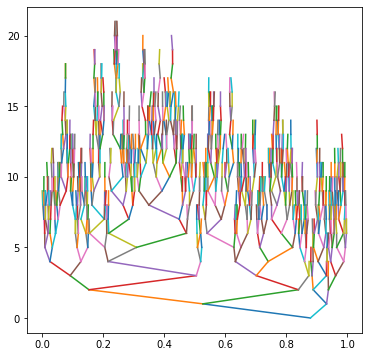

In [76]:
bst = BST()

l = np.random.random(1000)

for i in l:
    bst.add(i)

bst.root.plot()
plt.show()


## Algorytmy przeszukiwania

In [77]:
class TreeNode:
    def __init__(self, value, children) -> None:
        self.value = value
        self.children = children

    def __repr__(self) -> str:
        return f"{self.value}"

In [78]:
tree = TreeNode((1,1), [
                        TreeNode((2,2), [
                            TreeNode((3,3), [
                                TreeNode((4,4), [])
                            ])
                        ]),
                        TreeNode((5,2), []),
                        TreeNode((6,2), [
                            TreeNode((7,3), []),
                            TreeNode((8,3), [
                                TreeNode((9,4), [])
                            ])
                        ])
])

#### [Przeszukiwanie wszerz](https://en.wikipedia.org/wiki/Breadth-first_search)

Chcemy przejść po drzewie i wykonać funkcję `f` na wierzchołkach poziom po poziomie.

In [79]:
from collections import deque

def BFS(f, root):
    q = deque([root])
    while q:
        current = q.popleft()
        q.extend(current.children)
        f(current)

In [80]:
BFS(print, tree)

(1, 1)
(2, 2)
(5, 2)
(6, 2)
(3, 3)
(7, 3)
(8, 3)
(4, 4)
(9, 4)


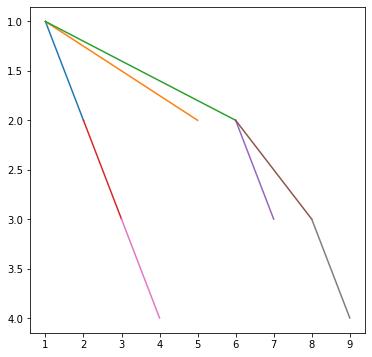

In [81]:
def plotBranches(node):
    x, y = node.value
    for child in node.children:
        xc, yc = child.value
        plt.plot([x, xc], [y, yc])

ax = plt.gca()
ax.invert_yaxis()
BFS(plotBranches, tree)
plt.show()

BFS wyświetlający wszystkie pliki w folderze jeden poziom wyżej

In [82]:
from os import getcwd, listdir, path
from collections import deque

def dirBFS(root):
    q = deque([root])
    while q:
        dir = q.popleft()
        children = [path.join(dir, d) for d in listdir(dir)]
        folders = [child for child in children if path.isdir(child)]
        q.extend(folders)
        files = [child for child in children if path.isfile(child)]
        for f in files:
            print(f)

dirBFS('..')

..\.git\COMMIT_EDITMSG
..\.git\config
..\.git\description
..\.git\FETCH_HEAD
..\.git\HEAD
..\.git\index
..\.git\ORIG_HEAD
..\.vscode\settings.json
..\js\index.html
..\js\tmp.js
..\python\aisd.gifs.ipynb
..\python\aisd.ipynb
..\python\elephants.ipynb
..\python\intermediate.exercises.ipynb
..\python\intermediate.ipynb
..\python\intermediate.solutions.ipynb
..\.git\hooks\applypatch-msg.sample
..\.git\hooks\commit-msg.sample
..\.git\hooks\fsmonitor-watchman.sample
..\.git\hooks\post-update.sample
..\.git\hooks\pre-applypatch.sample
..\.git\hooks\pre-commit.sample
..\.git\hooks\pre-merge-commit.sample
..\.git\hooks\pre-push.sample
..\.git\hooks\pre-rebase.sample
..\.git\hooks\pre-receive.sample
..\.git\hooks\prepare-commit-msg.sample
..\.git\hooks\push-to-checkout.sample
..\.git\hooks\update.sample
..\.git\info\exclude
..\.git\logs\HEAD
..\js\dataStructures\linkedList.js
..\python\gifs\bogo.gif
..\python\gifs\dijkstra.gif
..\python\gifs\merge.gif
..\python\gifs\MST.gif
..\python\samples\SBE

#### [Przeszukiwanie wgłąb](https://en.wikipedia.org/wiki/Depth-first_search)

Chcemy przejść po drzewie zagłębiając się w kolejne gałęzie aż dojdziemy do dna, wykonując na wszystkich węzłach po drodze funkcję `f`.

In [83]:
def DFS(f, root):
    stack = [root]
    while stack:
        current = stack.pop()
        stack.extend(current.children[::-1])
        f(current)

In [84]:
DFS(print, tree)

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 2)
(6, 2)
(7, 3)
(8, 3)
(9, 4)


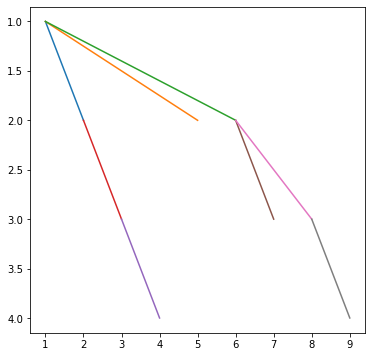

In [85]:
ax = plt.gca()
ax.invert_yaxis()
DFS(plotBranches, tree)
plt.show()

In [86]:
def recDFS(f, root):
    f(root)
    for child in root.children:
        recDFS(f, child)

In [87]:
recDFS(print, tree)

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 2)
(6, 2)
(7, 3)
(8, 3)
(9, 4)


BFS wyświetlający wszystkie pliki w folderze jeden poziom wyżej

In [88]:
def dirDFS(root):
    q = deque([root])
    while q:
        dir = q.pop()
        children = [path.join(dir, d) for d in listdir(dir)]
        folders = [child for child in children if path.isdir(child)]
        q.extend(folders)
        files = [child for child in children if path.isfile(child)]
        for f in files:
            print(f)

dirDFS('..')

..\python\aisd.gifs.ipynb
..\python\aisd.ipynb
..\python\elephants.ipynb
..\python\intermediate.exercises.ipynb
..\python\intermediate.ipynb
..\python\intermediate.solutions.ipynb
..\python\samples\SBE39plus_03907421_2022_10_26.asc
..\python\gifs\bogo.gif
..\python\gifs\dijkstra.gif
..\python\gifs\merge.gif
..\python\gifs\MST.gif
..\js\index.html
..\js\tmp.js
..\js\dataStructures\linkedList.js
..\js\algorithms\recursive\factorial.html
..\js\algorithms\recursive\fibonacci.html
..\js\algorithms\recursive\fibonacci_dynamic.html
..\js\algorithms\recursive\recursive.html
..\js\algorithms\naive\bubblesort.js
..\js\algorithms\naive\insertionsort.js
..\js\algorithms\naive\selectionsort.js
..\js\algorithms\naive\sketch.js
..\js\algorithms\naive\sort.html
..\js\algorithms\naive\style.css
..\js\algorithms\monteCarlo\pi.html
..\js\algorithms\monteCarlo\pi.js
..\js\algorithms\monteCarlo\sketch.js
..\js\algorithms\monteCarlo\style.css
..\js\algorithms\dnc\dnc.html
..\js\algorithms\dnc\sort\mergesort

## Algorytmy przechodzenia

### [Algorytm Dijkstry](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)

Załóż, że do wszystkich wierzchołków, poza startowym, jesteś w stanie dojść z kosztem $\inf$. Do startowego wierzchołka zaś dochodzimy z kosztem $0$. Pobierz najbliższy wierzchołek z kolejki i sprawdź, czy nie jesteś w stanie z niego dotrzeć szybciej do jego sąsiadów. Jeśli tak, podmień koszty. Powtarzaj aż do wyczerpania kolejki.

In [89]:
N = 1000
xs = np.random.random((N, 1))
ys = np.random.random((N, 1))

G = (xs - xs.T) ** 2.0 + (ys - ys.T) ** 2.0

In [90]:
def dijkstra(G, s):
    N = G.shape[0]
    d = np.ones(N) * inf
    d[s] = 0
    prevs = np.ones(N, dtype='int64') * -1
    prevs[s] = s
    Q = FibonacciHeap()
    fibnodes = []
    for v in range(N):
        node = Q.insert(d[v], v)
        fibnodes.append(node)
    while not Q.isEmpty():
        u = Q.extract_min().value
        for v in range(N):
            if d[v] > d[u] + G[u, v]:
                d[v] = d[u] + G[u, v]
                prevs[v] = u
                Q.decrease_key(fibnodes[v], d[v])
    return d, prevs

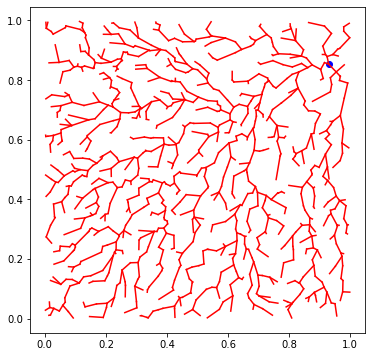

In [91]:
s = 0
d, prevs = dijkstra(G, s)
plt.scatter([xs[s, 0]], [ys[s, 0]], c='b')
for i in range(N):
    x0, x1 = xs[i, 0], xs[prevs[i], 0]
    y0, y1 = ys[i, 0], ys[prevs[i], 0]
    plt.plot([x0, x1], [y0, y1], 'r')

plt.show()

## [Minimalne drzewo rozpinające](https://en.wikipedia.org/wiki/Minimum_spanning_tree)

[Implementacja algorytmu Kruskala](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm), inne rozwiązania to m.in. [algorytm Prima](https://en.wikipedia.org/wiki/Prim%27s_algorithm) i [algorytm Borůvki](https://en.wikipedia.org/wiki/Bor%C5%AFvka%27s_algorithm).

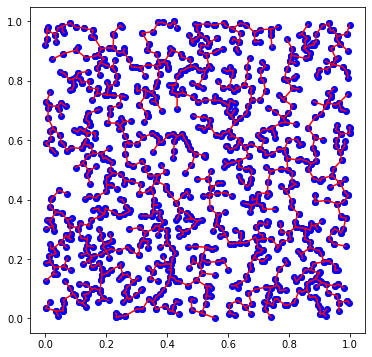

In [92]:
import numpy as np
from matplotlib import pyplot as plt

N = 1000
xs = np.random.random(N)
ys = np.random.random(N)

def distSquare(i, j):
    return (xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2

dists = [(i, j, distSquare(i, j)) for i in range(N) for j in range(N) if i < j]

dists.sort(key=(lambda x: x[2]))

MST = []
heads = {i: i for i in range(N)}

def getHead(i):
    if heads[i] == i:
        return i
    else:
        heads[i] = getHead(heads[i])
        return heads[i]

for (i, j, _) in dists:
    if len(MST) >= N - 1:
        break
    headi, headj = getHead(i), getHead(j)
    if headi != headj:
        MST.append((i, j))
        heads[headi] = headj

for (i, j) in MST:
    plt.scatter([xs[i], xs[j]], [ys[i], ys[j]], c='b')

for (i, j) in MST:
    plt.plot([xs[i], xs[j]], [ys[i], ys[j]], 'r')


plt.show()
